In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [2]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [3]:
house_prices.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
Sum = house_prices.isnull().sum()
Percentage = ( house_prices.isnull().sum()/house_prices.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
id,0,0.000000
mssubclass,0,0.000000
mszoning,0,0.000000
lotfrontage,259,0.177397
lotarea,0,0.000000
street,0,0.000000
alley,1369,0.937671
lotshape,0,0.000000
landcontour,0,0.000000
utilities,0,0.000000


In [5]:
clean_house_prices = house_prices.dropna(axis=1)

In [6]:
Sum = clean_house_prices.isnull().sum()
Percentage = ( clean_house_prices.isnull().sum()/clean_house_prices.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
id,0,0.0
mssubclass,0,0.0
mszoning,0,0.0
lotarea,0,0.0
street,0,0.0
lotshape,0,0.0
landcontour,0,0.0
utilities,0,0.0
lotconfig,0,0.0
landslope,0,0.0


In [7]:
clean_house_prices.saleprice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

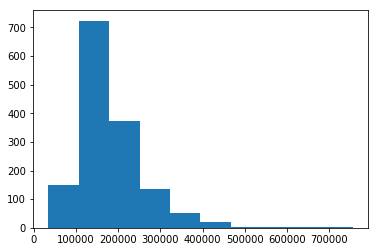

In [8]:
plt.hist(clean_house_prices.saleprice)

In [9]:
non_numeric_columns = clean_house_prices.select_dtypes(['object']).columns

In [10]:
numeric_columns = clean_house_prices.select_dtypes(['int64', 'float64']).columns

In [11]:
np.abs(clean_house_prices[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
fireplaces       0.466929
bsmtfinsf1       0.386420
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

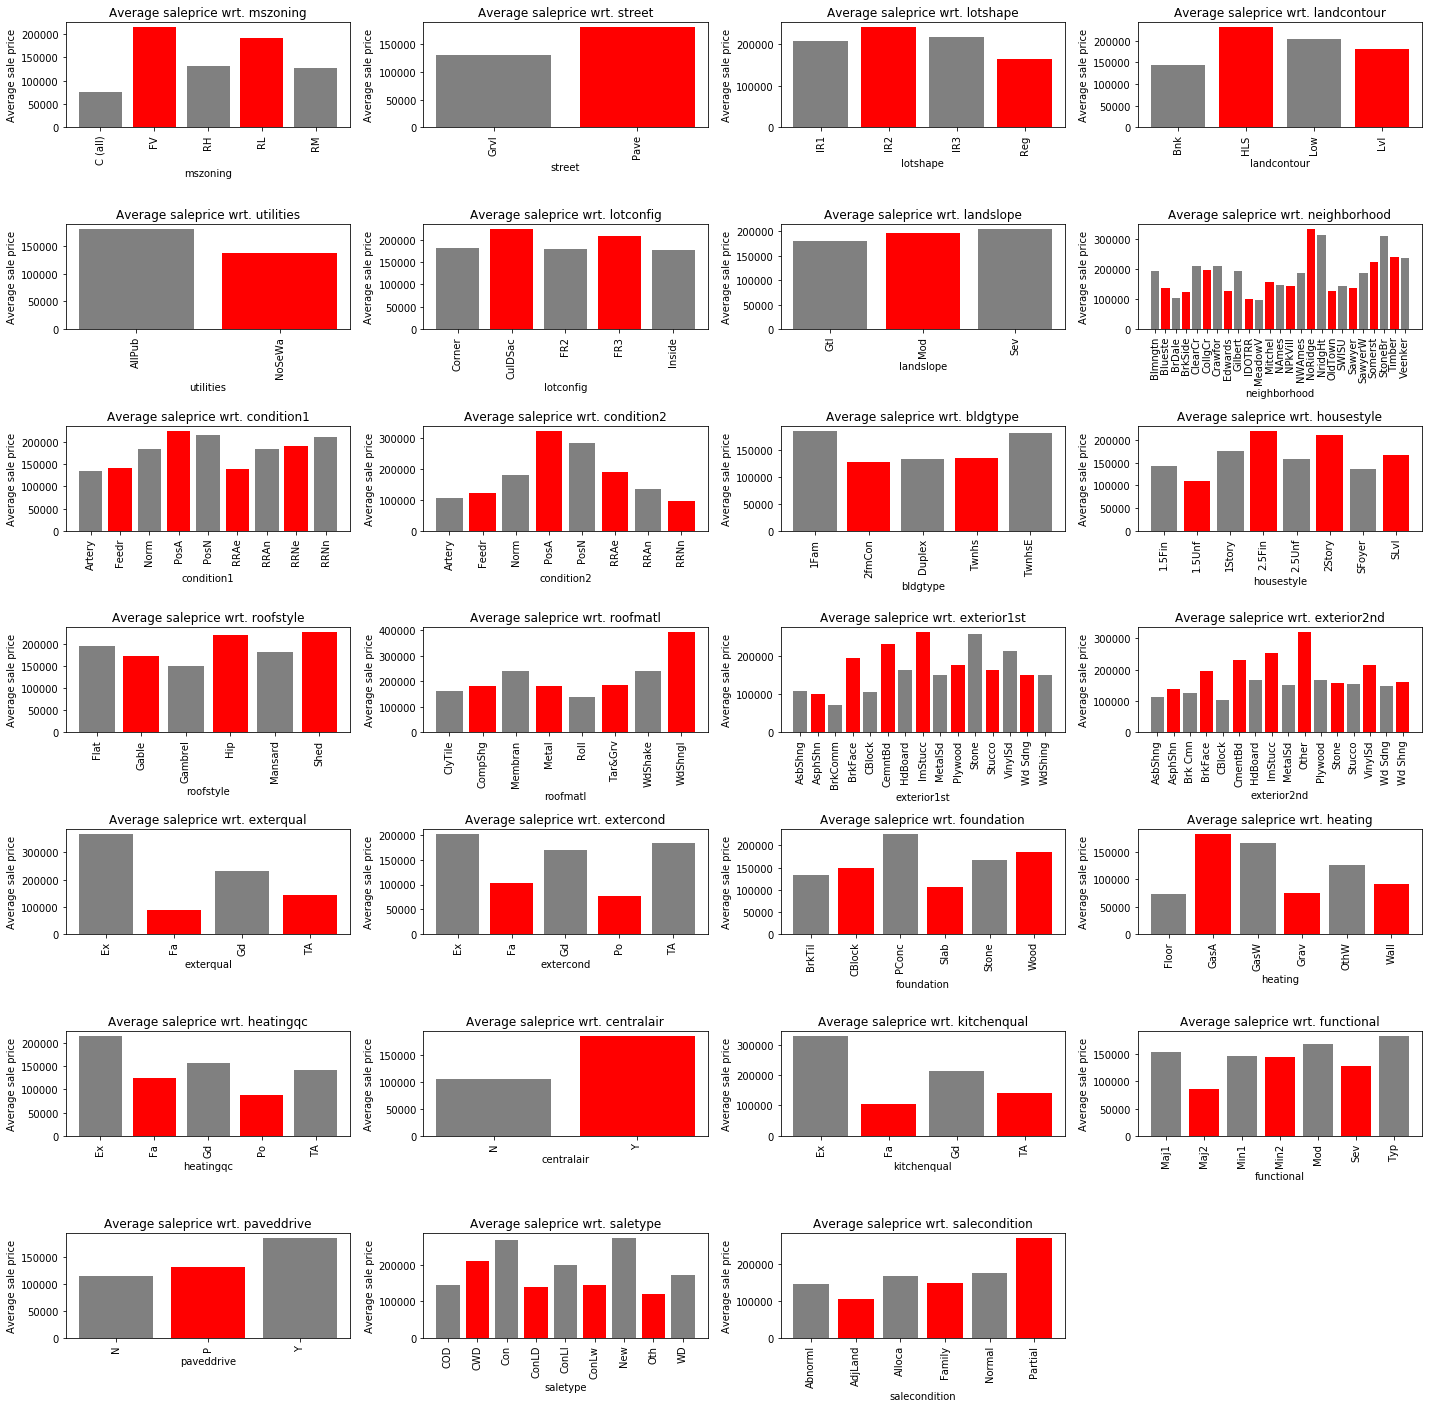

In [12]:
plt.figure(figsize=(20,30))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(clean_house_prices.groupby(column)["saleprice"].mean().index, clean_house_prices.groupby(column)["saleprice"].mean(),
           color=("grey","red"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [13]:
clean_house_prices = pd.concat([clean_house_prices,pd.get_dummies(clean_house_prices.mszoning, prefix="mszoning", drop_first=True)], axis=1)
clean_house_prices = pd.concat([clean_house_prices,pd.get_dummies(clean_house_prices.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(clean_house_prices.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(clean_house_prices.street, prefix="street", drop_first=True).columns)

In [14]:
X = clean_house_prices[['overallqual', 'grlivarea', 'garagecars'] + dummy_column_names]
Y = clean_house_prices.saleprice

In [15]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     549.0
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:27:13   Log-Likelihood:                -17527.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1451   BIC:                         3.512e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.096e+05   1.86e+04     -5.887      0.000   -1.46e+05   -7.31e+04
overallqual  2.661e+04   1074.606     24.760      0.000    2.45e+04    2.87e+04
grlivarea      50.0756      2.514     19.922      0.000      45.145      55.006
garagecars   1.933e+04   1790.940     10.795      0.000    1.58e+04    2.28e+04
mszoning_FV  1.769e+04   1.42e+04      1.249      0.212   -1.01e+04    4.55e+04
mszoning_RH  9636.3657   1.64e+04      0.587      0.557   -2.25e+04    4.18e+04
mszoning_RL  2.825e+04   1.32e+04      2.147      0.032    2434.497    5.41e+04
mszoning_RM  3588.3038   1.33e+04      0.269      0.788   -2.25e+04    2.97e+04
street_Pave -5517.6240   1.68e+04     -0.328      0.743   -3.86e+04    2.75e+04
==============================================================================
Omnibus:                      479.140   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11938.521
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                      16.878   Cond. No.                     4.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""